# Mushroom Classification Project

## Project Description
This project focuses on classifying mushrooms as edible or poisonous using a classification model. The dataset contains various features of mushrooms that can help determine their edibility. The goal is to build a robust classification model to assist in identifying whether a mushroom is safe to eat or not.


## Dataset Description
The Mushroom Classification dataset is sourced from the UCI Machine Learning Repository. It includes 22 categorical features and one target variable, which indicates whether a mushroom is edible or poisonous.

- **class:** Edible (e) or Poisonous (p)
- **cap-shape:** bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
- **cap-surface:** fibrous=f, grooves=g, scaly=y, smooth=s
- **cap-color:** brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
- **bruises:** bruises=t, no=f
- **odor:** almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
- **gill-attachment:** attached=a, descending=d, free=f, notched=n
- **gill-spacing:** close=c, crowded=w, distant=d
- **gill-size:** broad=b, narrow=n
- **gill-color:** black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
- **stalk-shape:** enlarging=e, tapering=t
- **stalk-root:** bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
- **stalk-surface-above-ring:** fibrous=f, scaly=y, silky=k, smooth=s
- **stalk-surface-below-ring:** fibrous=f, scaly=y, silky=k, smooth=s
- **stalk-color-above-ring:** brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- **stalk-color-below-ring:** brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- **veil-type:** partial=p, universal=u
- **veil-color:** brown=n, orange=o, white=w, yellow=y
- **ring-number:** none=n, one=o, two=t
- **ring-type:** cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
- **spore-print-color:** black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
- **population:** abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
- **habitat:** grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

### Data Preprocessing
Let's load and preprocess the data. Here's an example of how to get started:

In [1]:
import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploratory Data Analysis (EDA)
Perform some exploratory data analysis to understand the dataset better:
### Checking for Missing Values

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


### Class Distribution
The class distribution shows the balance between edible and poisonous mushrooms.

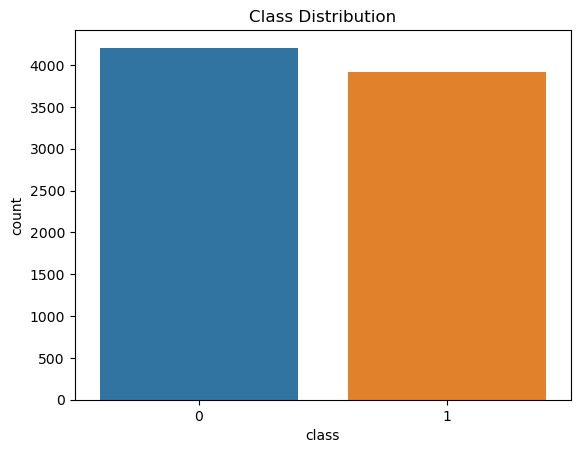

In [9]:
# Display class distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

### Feature Distributions
Visualizing the distribution of key features to understand their impact on classification.

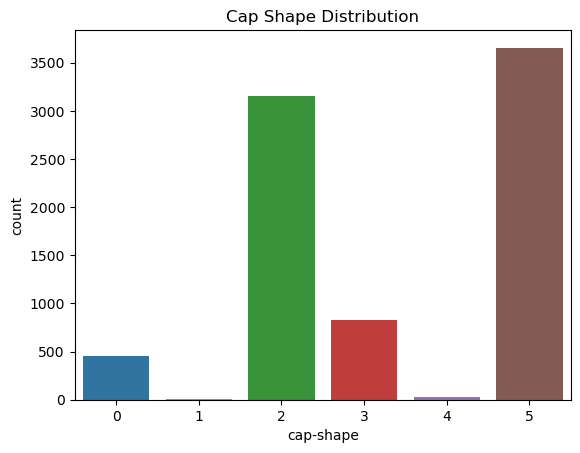

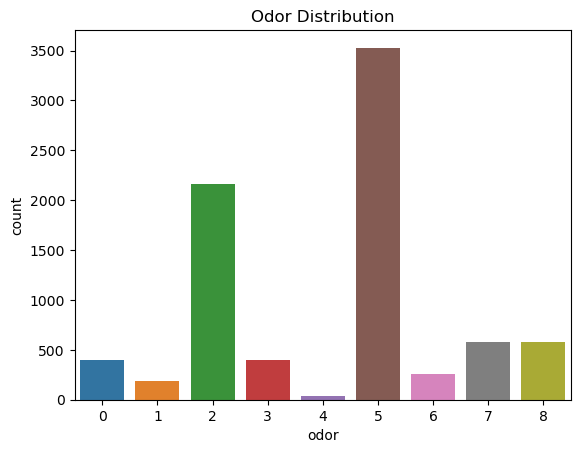

In [10]:
# Display the distribution of a few features
sns.countplot(x='cap-shape', data=df)
plt.title('Cap Shape Distribution')
plt.show()

sns.countplot(x='odor', data=df)
plt.title('Odor Distribution')
plt.show()

## Data Preprocessing



### Encoding Categorical Variables
Encoding categorical variables using LabelEncoder.

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Model Building


### Random Forest Classifier
Building a Random Forest classifier to predict whether a mushroom is edible or poisonous.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

### Accuracy and Classification Report
Evaluating the model using accuracy, classification report, and confusion matrix.

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Confusion Matrix:
[[1257    0]
 [   0 1181]]


## Testing with New Data

### Testing with Arbitrary Input Values
Testing the model with new arbitrary input values to demonstrate its practical application.

In [7]:
# Define new input values
new_input = [0, 2, 5, 4, 1, 2, 3, 6, 4, 0, 1, 2, 2, 4, 4, 1, 0, 2, 0, 1, 2, 5]

# Predict the class
new_prediction = model.predict([new_input])
predicted_class = label_encoders['class'].inverse_transform(new_prediction)
print(f'Predicted Class: {predicted_class[0]}')

Predicted Class: p


C:\Users\hassa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Conclusion

### Summary of Findings
- The model achieved an accuracy of 1.00, indicating strong performance in classifying mushrooms as edible or poisonous.
- Key features influencing the classification include odor, cap color, and gill size.

### Next Steps
- Further analysis can be done by exploring other classification algorithms or fine-tuning the current model.
- Additional features or external data sources could be integrated to improve model performance.
